# Importing our Libraries

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs

# Reading the data and checking it

In [13]:
df = pd.read_csv("Clustering_gmm (2).csv")
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [14]:
df.shape

(500, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [16]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

# `Scatter` plot between the Weights and the Heights

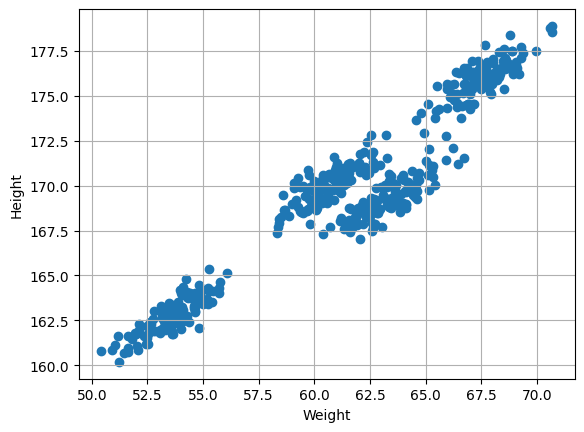

In [17]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid()

# `Histogram` with the Weight and Height counts 

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

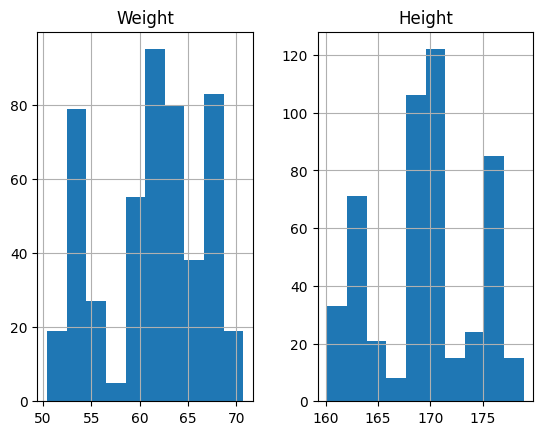

In [18]:
df.hist()

# Scaling the data 

In [19]:
ss = StandardScaler()
df1 = ss.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


# GMM from scratch

In [20]:
def gmm(df, n_clusters, n_iterations=200):
    n_samples, n_features = df.shape  
    means = df.iloc[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = [np.eye(n_features) for _ in range(n_clusters)]
    weights = np.ones(n_clusters) / n_clusters
    
    for i in range(n_iterations):
        # E-step
        responsibilities = []
        for j in range(n_clusters):
            numerator = multivariate_normal.pdf(df, mean=means.iloc[j], cov=covariances[j]) * weights[j]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ df) / total_resp[:, np.newaxis]
        
        for j in range(n_clusters):
            diff = df - means.iloc[j]
            covariances[j] = ((responsibilities[:,j] * diff.T) @ diff) / total_resp[j]
            
    return means, covariances, weights




estimated_means, estimated_covariances, estimated_weights = gmm(df1, 4)

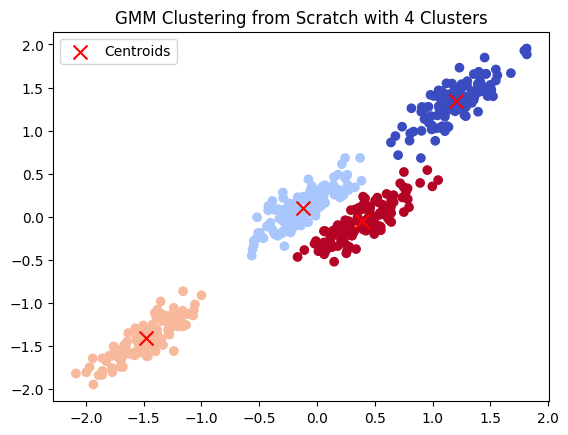

In [21]:
def assign_clusters(df1, means, covariances, weights):
    n_samples = df1.shape[0]
    n_clusters = len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    for k in range(n_clusters):
        responsibilities[:, k] = multivariate_normal.pdf(df1, mean=means.iloc[k], cov=covariances[k]) * weights[k]
    cluster_assignments = np.argmax(responsibilities, axis=1)
    return cluster_assignments

predicted_assignments = assign_clusters(df1, estimated_means, estimated_covariances, estimated_weights)

plt.scatter(df1['Weight'], df1['Height'], c=predicted_assignments, cmap='coolwarm')
plt.scatter(estimated_means['Weight'], estimated_means['Height'], marker='x', s=100, color='red', label='Centroids')
plt.legend()
plt.title(f'GMM Clustering from Scratch with {len(estimated_means)} Clusters')
plt.show()